<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/Customer_Feedback_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Amazon Customer Behavior Survey.csv')
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
# describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,602.0,30.790698,10.193276,3.0,23.0,26.0,36.0,67.0
Customer_Reviews_Importance,602.0,2.480066,1.185226,1.0,1.0,3.0,3.0,5.0
Personalized_Recommendation_Frequency,602.0,2.699336,1.042028,1.0,2.0,3.0,3.0,5.0
Rating_Accuracy,602.0,2.672757,0.899744,1.0,2.0,3.0,3.0,5.0
Shopping_Satisfaction,602.0,2.463455,1.012152,1.0,2.0,2.0,3.0,5.0


In [ ]:
# drop Timestamp from dataset
df.drop(['Timestamp'],inplace=True,axis=1)

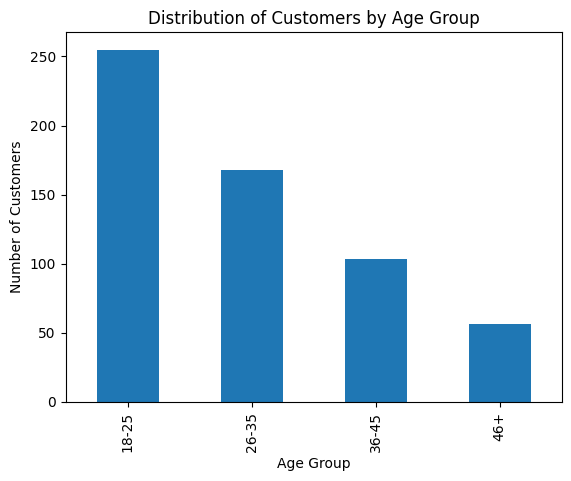

In [ ]:
bins = [18, 25, 35, 45, float('inf')]
labels = ['18-25', '26-35', '36-45', '46+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_group_counts = df['age_group'].value_counts()
age_group_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age Group')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Purchase_Frequency_encoded'] = label_encoder.fit_transform(df['Purchase_Frequency'])


In [ ]:
from scipy.stats import ttest_ind
Purchase_Frequency = df[df['Purchase_Frequency'] == 'Yes']['Shopping_Satisfaction']
non_repeat_purchasers = df[df['Purchase_Frequency'] == 'No']['Shopping_Satisfaction']

t_statistic, p_value = ttest_ind(Purchase_Frequency, non_repeat_purchasers)


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Purchase_Frequency'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p)


P-value: 0.0007025216973103722


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'age' and 'product_trading'
covariance_matrix = df[['age', 'Purchase_Categories']].cov()

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
            age
age  103.902875


<ipython-input-16-295407d7253e>:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df[['age', 'Purchase_Categories']].cov()


<ipython-input-17-9bf333124161>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, fmt='.1g')


<Axes: >

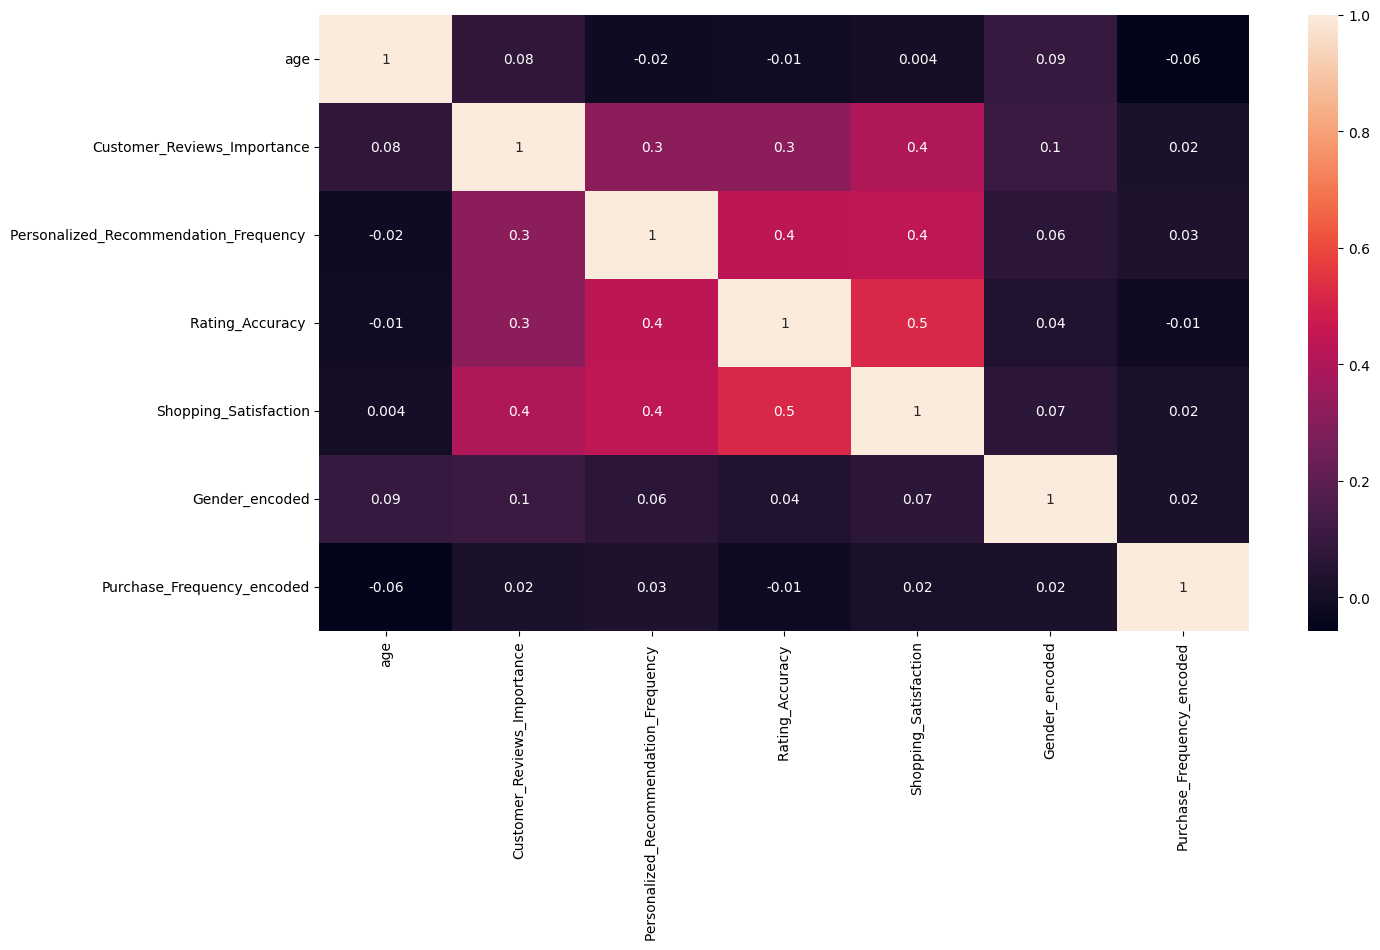

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.1g')